In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
os.getcwd()

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

import numpy as np
import keras 
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import to_categorical
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

C:\Users\Marakhi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
A = 0
k = 0
for filename in glob.glob('C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization\\raw data\\*.JPG'):
    im=cv2.imread(filename)
    x = im.shape
    height = list(range(x[0]))
    height = height[0:x[0]:int((x[0]-1)/4)]
    width = list(range(x[1]))
    width = width[0:x[1]:int((x[1]-1)/3)]
    print("width, height : ",x[0], x[1], width, height)
    for i in range(3):
        for j in range(4):
            crop_img = im[height[j]:height[j+1], width[i]:width[i+1]]
            resize_img = cv2.resize(crop_img, (100,100), interpolation = cv2.INTER_AREA)
            file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization\\data\\'+str(A)+'.jpg'
            cv2.imwrite(file_name, resize_img)
            if k==0:
                x_train=np.expand_dims(resize_img, axis=0)
                k = k+1
            else:
                x_train = np.concatenate((x_train, np.expand_dims(resize_img, axis=0)), axis=0)               
            print(width[i+1],height[j+1])
            A = A+1 


width, height :  2745 2009 [0, 669, 1338, 2007] [0, 686, 1372, 2058, 2744]
669 686
669 1372
669 2058
669 2744
1338 686
1338 1372
1338 2058
1338 2744
2007 686
2007 1372
2007 2058
2007 2744
width, height :  2761 2001 [0, 666, 1332, 1998] [0, 690, 1380, 2070, 2760]
666 690
666 1380
666 2070
666 2760
1332 690
1332 1380
1332 2070
1332 2760
1998 690
1998 1380
1998 2070
1998 2760
width, height :  2769 1993 [0, 664, 1328, 1992] [0, 692, 1384, 2076, 2768]
664 692
664 1384
664 2076
664 2768
1328 692
1328 1384
1328 2076
1328 2768
1992 692
1992 1384
1992 2076
1992 2768
width, height :  2792 2032 [0, 677, 1354, 2031] [0, 697, 1394, 2091, 2788]
677 697
677 1394
677 2091
677 2788
1354 697
1354 1394
1354 2091
1354 2788
2031 697
2031 1394
2031 2091
2031 2788
width, height :  2753 1985 [0, 661, 1322, 1983] [0, 688, 1376, 2064, 2752]
661 688
661 1376
661 2064
661 2752
1322 688
1322 1376
1322 2064
1322 2752
1983 688
1983 1376
1983 2064
1983 2752
width, height :  2769 2017 [0, 672, 1344, 2016] [0, 692, 138

In [3]:
#x_train1 = x_train
x_train = x_train1[0:200]
plt.imshow(x_train[242])



IndexError: index 242 is out of bounds for axis 0 with size 200

In [4]:
y_train = np.zeros((200, 2), dtype=np.float32)

y_train[0,0] =0.53
y_train[1,0] =0.53
y_train[2,0] =0.52
y_train[3,0] =0.48
y_train[4,0] =0.39
y_train[5,0] =0.47
y_train[6,0] =0.54
y_train[7,0] =0.57
y_train[8,0] =0.46
y_train[9,0] =0.5
y_train[10,0] =0.57
y_train[11,0] =0.51
y_train[12,0] =0.47
y_train[13,0] =0.65
y_train[14,0] =0.32
y_train[15,0] =0.32
y_train[16,0] =0.74
y_train[17,0] =0.45
y_train[18,0] =0.73
y_train[19,0] =0.38
y_train[20,0] =0.47
y_train[21,0] =0.48
y_train[22,0] =0.34
y_train[23,0] =0.76
y_train[24,0] =0.55
y_train[25,0] =0.53
y_train[26,0] =0.48
y_train[27,0] =0.51
y_train[28,0] =0.5
y_train[29,0] =0.53
y_train[30,0] =0.52
y_train[31,0] =0.55
y_train[32,0] =0.46
y_train[33,0] =0.5
y_train[34,0] =0.52
y_train[35,0] =0.47
y_train[36,0] =0.5
y_train[37,0] =0.45
y_train[38,0] =0.57
y_train[39,0] =0.49
y_train[40,0] =0.53
y_train[41,0] =0.56
y_train[42,0] =0.56
y_train[43,0] =0.48
y_train[44,0] =0.54
y_train[45,0] =0.47
y_train[46,0] =0.44
y_train[47,0] =0.39
y_train[48,0] =0.52
y_train[49,0] =0.47
y_train[50,0] =0.38
y_train[51,0] =0.51
y_train[52,0] =0.53
y_train[53,0] =0.46
y_train[54,0] =0.59
y_train[55,0] =0.63
y_train[56,0] =0.47
y_train[57,0] =0.54
y_train[58,0] =0.68
y_train[59,0] =0.5
y_train[60,0] =0.45
y_train[61,0] =0.48
y_train[62,0] =0.45
y_train[63,0] =0.31
y_train[64,0] =0.42
y_train[65,0] =0.52
y_train[66,0] =0.52
y_train[67,0] =0.26
y_train[68,0] =0.45
y_train[69,0] =0.54
y_train[70,0] =0.42
y_train[71,0] =0.49
y_train[72,0] =0.48
y_train[73,0] =0.5
y_train[74,0] =0.47
y_train[75,0] =0.49
y_train[76,0] =0.41
y_train[77,0] =0.5
y_train[78,0] =0.55
y_train[79,0] =0.58
y_train[80,0] =0.5
y_train[81,0] =0.52
y_train[82,0] =0.49
y_train[83,0] =0.53
y_train[84,0] =0.4
y_train[85,0] =0.48
y_train[86,0] =0.5
y_train[87,0] =0.55
y_train[88,0] =0.45
y_train[89,0] =0.45
y_train[90,0] =0.48
y_train[91,0] =0.4
y_train[92,0] =0.51
y_train[93,0] =0.53
y_train[94,0] =0.49
y_train[95,0] =0.53
y_train[96,0] =0.51
y_train[97,0] =0.33
y_train[98,0] =0.36
y_train[99,0] =0.45
y_train[100,0] =0.48
y_train[101,0] =0.52
y_train[102,0] =0.51
y_train[103,0] =0.42
y_train[104,0] =0.49
y_train[105,0] =0.49
y_train[106,0] =0.51
y_train[107,0] =0.61
y_train[108,0] =0.51
y_train[109,0] =0.52
y_train[110,0] =0.49
y_train[111,0] =0.26
y_train[112,0] =0.49
y_train[113,0] =0.46
y_train[114,0] =0.55
y_train[115,0] =0.39
y_train[116,0] =0.57
y_train[117,0] =0.47
y_train[118,0] =0.46
y_train[119,0] =0.46
y_train[120,0] =0.51
y_train[121,0] =0.3
y_train[122,0] =0.43
y_train[123,0] =0.36
y_train[124,0] =0.43
y_train[125,0] =0.48
y_train[126,0] =0.55
y_train[127,0] =0.68
y_train[128,0] =0.53
y_train[129,0] =0.5
y_train[130,0] =0.52
y_train[131,0] =0.72
y_train[132,0] =0.47
y_train[133,0] =0.52
y_train[134,0] =0.49
y_train[135,0] =0.52
y_train[136,0] =0.47
y_train[137,0] =0.48
y_train[138,0] =0.55
y_train[139,0] =0.55
y_train[140,0] =0.54
y_train[141,0] =0.59
y_train[142,0] =0.5
y_train[143,0] =0.6
y_train[144,0] =0.45
y_train[145,0] =0.49
y_train[146,0] =0.41
y_train[147,0] =0.42
y_train[148,0] =0.48
y_train[149,0] =0.48
y_train[150,0] =0.58
y_train[151,0] =0.6
y_train[152,0] =0.47
y_train[153,0] =0.59
y_train[154,0] =0.63
y_train[155,0] =0.65
y_train[156,0] =0.46
y_train[157,0] =0.55
y_train[158,0] =0.48
y_train[159,0] =0.48
y_train[160,0] =0.46
y_train[161,0] =0.5
y_train[162,0] =0.47
y_train[163,0] =0.51
y_train[164,0] =0.54
y_train[165,0] =0.5
y_train[166,0] =0.52
y_train[167,0] =0.48
y_train[168,0] =0.51
y_train[169,0] =0.46
y_train[170,0] =0.56
y_train[171,0] =0.52
y_train[172,0] =0.43
y_train[173,0] =0.44
y_train[174,0] =0.49
y_train[175,0] =0.58
y_train[176,0] =0.47
y_train[177,0] =0.48
y_train[178,0] =0.52
y_train[179,0] =0.47
y_train[180,0] =0.46
y_train[181,0] =0.55
y_train[182,0] =0.5
y_train[183,0] =0.44
y_train[184,0] =0.46
y_train[185,0] =0.51
y_train[186,0] =0.39
y_train[187,0] =0.57
y_train[188,0] =0.42
y_train[189,0] =0.47
y_train[190,0] =0.43
y_train[191,0] =0.49
y_train[192,0] =0.58
y_train[193,0] =0.52
y_train[194,0] =0.42
y_train[195,0] =0.53
y_train[196,0] =0.68
y_train[197,0] =0.35
y_train[198,0] =0.5
y_train[199,0] =0.6

y_train[0,1] =0.46
y_train[1,1] =0.48
y_train[2,1] =0.5
y_train[3,1] =0.5
y_train[4,1] =0.42
y_train[5,1] =0.4
y_train[6,1] =0.49
y_train[7,1] =0.48
y_train[8,1] =0.47
y_train[9,1] =0.5
y_train[10,1] =0.47
y_train[11,1] =0.63
y_train[12,1] =0.65
y_train[13,1] =0.43
y_train[14,1] =0.35
y_train[15,1] =0.65
y_train[16,1] =0.45
y_train[17,1] =0.78
y_train[18,1] =0.76
y_train[19,1] =0.39
y_train[20,1] =0.66
y_train[21,1] =0.4
y_train[22,1] =0.69
y_train[23,1] =0.25
y_train[24,1] =0.5
y_train[25,1] =0.5
y_train[26,1] =0.45
y_train[27,1] =0.5
y_train[28,1] =0.5
y_train[29,1] =0.52
y_train[30,1] =0.52
y_train[31,1] =0.56
y_train[32,1] =0.49
y_train[33,1] =0.5
y_train[34,1] =0.52
y_train[35,1] =0.62
y_train[36,1] =0.39
y_train[37,1] =0.53
y_train[38,1] =0.58
y_train[39,1] =0.49
y_train[40,1] =0.45
y_train[41,1] =0.53
y_train[42,1] =0.56
y_train[43,1] =0.52
y_train[44,1] =0.47
y_train[45,1] =0.49
y_train[46,1] =0.49
y_train[47,1] =0.41
y_train[48,1] =0.49
y_train[49,1] =0.46
y_train[50,1] =0.55
y_train[51,1] =0.55
y_train[52,1] =0.4
y_train[53,1] =0.4
y_train[54,1] =0.43
y_train[55,1] =0.5
y_train[56,1] =0.39
y_train[57,1] =0.34
y_train[58,1] =0.57
y_train[59,1] =0.38
y_train[60,1] =0.42
y_train[61,1] =0.5
y_train[62,1] =0.5
y_train[63,1] =0.37
y_train[64,1] =0.35
y_train[65,1] =0.38
y_train[66,1] =0.49
y_train[67,1] =0.54
y_train[68,1] =0.4
y_train[69,1] =0.41
y_train[70,1] =0.46
y_train[71,1] =0.35
y_train[72,1] =0.37
y_train[73,1] =0.32
y_train[74,1] =0.48
y_train[75,1] =0.47
y_train[76,1] =0.4
y_train[77,1] =0.39
y_train[78,1] =0.39
y_train[79,1] =0.47
y_train[80,1] =0.43
y_train[81,1] =0.39
y_train[82,1] =0.47
y_train[83,1] =0.41
y_train[84,1] =0.49
y_train[85,1] =0.44
y_train[86,1] =0.45
y_train[87,1] =0.41
y_train[88,1] =0.43
y_train[89,1] =0.4
y_train[90,1] =0.32
y_train[91,1] =0.45
y_train[92,1] =0.45
y_train[93,1] =0.38
y_train[94,1] =0.37
y_train[95,1] =0.47
y_train[96,1] =0.38
y_train[97,1] =0.41
y_train[98,1] =0.33
y_train[99,1] =0.41
y_train[100,1] =0.43
y_train[101,1] =0.44
y_train[102,1] =0.47
y_train[103,1] =0.53
y_train[104,1] =0.57
y_train[105,1] =0.56
y_train[106,1] =0.55
y_train[107,1] =0.4
y_train[108,1] =0.49
y_train[109,1] =0.51
y_train[110,1] =0.47
y_train[111,1] =0.46
y_train[112,1] =0.53
y_train[113,1] =0.54
y_train[114,1] =0.5
y_train[115,1] =0.42
y_train[116,1] =0.5
y_train[117,1] =0.51
y_train[118,1] =0.64
y_train[119,1] =0.63
y_train[120,1] =0.43
y_train[121,1] =0.17
y_train[122,1] =0.43
y_train[123,1] =0.61
y_train[124,1] =0.47
y_train[125,1] =0.28
y_train[126,1] =0.37
y_train[127,1] =0.36
y_train[128,1] =0.49
y_train[129,1] =0.34
y_train[130,1] =0.43
y_train[131,1] =0.31
y_train[132,1] =0.43
y_train[133,1] =0.37
y_train[134,1] =0.46
y_train[135,1] =0.55
y_train[136,1] =0.42
y_train[137,1] =0.34
y_train[138,1] =0.49
y_train[139,1] =0.57
y_train[140,1] =0.4
y_train[141,1] =0.44
y_train[142,1] =0.7
y_train[143,1] =0.4
y_train[144,1] =0.44
y_train[145,1] =0.49
y_train[146,1] =0.57
y_train[147,1] =0.61
y_train[148,1] =0.46
y_train[149,1] =0.45
y_train[150,1] =0.43
y_train[151,1] =0.65
y_train[152,1] =0.42
y_train[153,1] =0.3
y_train[154,1] =0.51
y_train[155,1] =0.41
y_train[156,1] =0.4
y_train[157,1] =0.31
y_train[158,1] =0.15
y_train[159,1] =0.51
y_train[160,1] =0.4
y_train[161,1] =0.21
y_train[162,1] =0.31
y_train[163,1] =0.49
y_train[164,1] =0.31
y_train[165,1] =0.41
y_train[166,1] =0.37
y_train[167,1] =0.64
y_train[168,1] =0.45
y_train[169,1] =0.47
y_train[170,1] =0.29
y_train[171,1] =0.46
y_train[172,1] =0.49
y_train[173,1] =0.39
y_train[174,1] =0.3
y_train[175,1] =0.44
y_train[176,1] =0.36
y_train[177,1] =0.32
y_train[178,1] =0.31
y_train[179,1] =0.46
y_train[180,1] =0.44
y_train[181,1] =0.29
y_train[182,1] =0.39
y_train[183,1] =0.3
y_train[184,1] =0.44
y_train[185,1] =0.29
y_train[186,1] =0.36
y_train[187,1] =0.27
y_train[188,1] =0.42
y_train[189,1] =0.23
y_train[190,1] =0.25
y_train[191,1] =0.2
y_train[192,1] =0.62
y_train[193,1] =0.44
y_train[194,1] =0.39
y_train[195,1] =0.4
y_train[196,1] =0.5
y_train[197,1] =0.44
y_train[198,1] =0.33
y_train[199,1] =0.32


In [5]:
print(y_train[199])

[0.6  0.32]


In [10]:
def HappyModel(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Conv2D(64, (5, 5), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    X = Conv2D(96, (3, 3), strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    X = Conv2D(128, (3, 3), strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    X = Dropout(0.25)(X)
    X = Flatten()(X)
    Y = Dense(2)(X)

    model = Model(inputs = X_input, outputs = Y, name='HappyModel')
    #model = Model(inputs = X_input, outputs = y2, name='HappyModel')

    return model

In [96]:
#happyModel = HappyModel(x_train.shape[1:])
#happyModel.compile('adam', 'mean_squared_error', metrics=['mse'])
happyModel.fit(x_train, y_train, epochs=200, batch_size=60)

Epoch 1/200
200/200 [==============================] - 115s 575ms/step - loss: 8.5888e-04 - mean_squared_error: 8.5888e-04
Epoch 2/200
200/200 [==============================] - 85s 425ms/step - loss: 6.4880e-04 - mean_squared_error: 6.4880e-04
Epoch 3/200
200/200 [==============================] - 84s 419ms/step - loss: 6.4446e-04 - mean_squared_error: 6.4446e-04
Epoch 4/200
200/200 [==============================] - 85s 425ms/step - loss: 7.7615e-04 - mean_squared_error: 7.7615e-04
Epoch 5/200
200/200 [==============================] - 83s 417ms/step - loss: 6.8617e-04 - mean_squared_error: 6.8617e-04
Epoch 6/200
200/200 [==============================] - 84s 419ms/step - loss: 8.6653e-04 - mean_squared_error: 8.6653e-04
Epoch 7/200
200/200 [==============================] - 84s 421ms/step - loss: 5.7632e-04 - mean_squared_error: 5.7632e-04
Epoch 8/200
200/200 [==============================] - 83s 415ms/step - loss: 7.1538e-04 - mean_squared_error: 7.1538e-04
Epoch 9/200
200/200 [==

200/200 [==============================] - 84s 418ms/step - loss: 7.7372e-04 - mean_squared_error: 7.7372e-04
Epoch 137/200
200/200 [==============================] - 85s 427ms/step - loss: 8.4385e-04 - mean_squared_error: 8.4385e-04
Epoch 138/200
200/200 [==============================] - 83s 416ms/step - loss: 7.1150e-04 - mean_squared_error: 7.1150e-04
Epoch 139/200
200/200 [==============================] - 83s 415ms/step - loss: 6.2445e-04 - mean_squared_error: 6.2445e-04
Epoch 140/200
200/200 [==============================] - 83s 415ms/step - loss: 9.8534e-04 - mean_squared_error: 9.8534e-04
Epoch 141/200
200/200 [==============================] - 83s 416ms/step - loss: 0.0011 - mean_squared_error: 0.0011 
Epoch 142/200
200/200 [==============================] - 83s 413ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 143/200
200/200 [==============================] - 83s 414ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 144/200
200/200 [======================

In [95]:
happyModel.save('my_model.h5')

In [115]:
x = image.img_to_array(x_train1[215])
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
#print(y_train[206])
mark_y=happyModel.predict(x)
print(mark_y)

[[0.6661849  0.48506758]]


In [119]:
x_train2 = x_train1[201:]
print(x_train2.shape)

(99, 100, 100, 3)


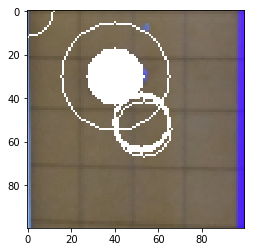

In [125]:
plt.imshow(x_train1[242])


In [128]:
for i in range(201,299,1):
    file_name = 'C:\\Users\\Marakhi\\Desktop\\Deep learning ajay bhammar\\Deep learning exercise\\Data localization\\Localization\\'+str(i)+'.jpg'
    im = cv2.imread(file_name)
    print(i)
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    tar_y = happyModel.predict(x)
    locliz = cv2.circle(im,(int(tar_y[0][0]*100),int(tar_y[0][1]*100)),13,(255,255,255))
    
    cv2.imwrite(file_name, locliz)

201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
